# Surface Lattice: Basics


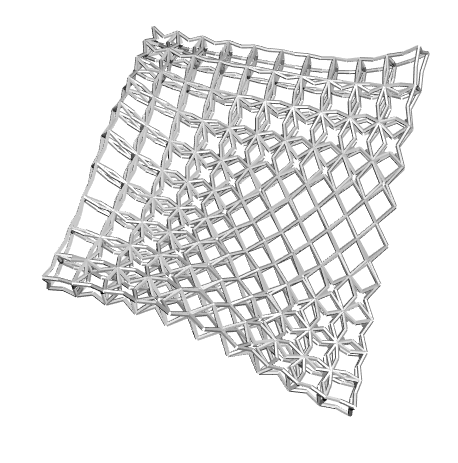

In [2]:
# install genysis library with: pip install genysis
import genysis
t = "eyJhbGciOiJIU.U892JiUy" # replace with your valid token

# upload files to be used in this demo
genysis.upload("models/surface_10by10.obj","surface_10by10.obj",t)
genysis.upload("models/surface_10by10_ceil.obj","surface_10by10_ceil.obj",t)

Welcome to GENYSIS
('uploading file size:', 0.004, 'MB')
[======================================================]108%
successfully uploaded models/surface_10by10.obj as surface_10by10.obj
('uploading file size:', 0.004, 'MB')
[======================================================]108%
successfully uploaded models/surface_10by10_ceil.obj as surface_10by10_ceil.obj


{u'message': u'surface_10by10_ceil.obj uploaded to test@test.com/surface_10by10_ceil.obj'}

In [4]:
# generate a pametric lattice unit
# the case parameter represent differenct topology of unit (0~7) 
# the rest of parameters control the shape of units, ranging from 0.0 to 1.0
genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=0.5,cBendIn=0,connectPt=0,output="cell_0.obj",token=t)
genysis.visualize("cell_0.obj",t,True,300,300)

('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 0.5, "centerChamfer": 0, "filename": "cell_0.obj", "t": "eyJhbGciOiJIU.U892JiUy", "connectPt": 0}')
('response: ', u'["cell_0.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=cell_0.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=cell_0.obj&t=eyJhbGciOiJIU.U892JiUy'

In [3]:
# array the generated lattice unit to a surface mesh with 10x10 grid
# please note the input surface has to be composed only by quad faces, triangle faces will be ignored
sl = genysis.surfaceLattice()
sl.setSurface("surface_10by10.obj")
sl.setCellHeight(2)
sl.setComponent("cell_0.obj")
sl.setOutput("surface_lattice_lines1.obj")
sl.run(t)

genysis.visualize("surface_lattice_lines1.obj",t,True)

('request: ', '{"autoScale": true, "EPSILON": 0.01, "component": "cell_0.obj", "filename": "surface_lattice_lines1.obj", "blendTargets": [], "base": "surface_10by10.obj", "t": "eyJhbGciOiJIU.U892JiUy", "ceil": null, "cellHeight": 2}')
('response: ', u'["surface_lattice_lines1.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines1.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines1.obj&t=eyJhbGciOiJIU.U892JiUy'

In [4]:
# generate a second lattice unit to be blended with first one. 
# (The lattice units can be blended with each other as long as their case numbers are same)
genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=0,cBendIn=0,connectPt=0,output="cell_1.obj",token=t)
genysis.visualize("cell_1.obj",t,True,300,300)

('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 0, "centerChamfer": 0, "filename": "cell_1.obj", "t": "eyJhbGciOiJIU.U892JiUy", "connectPt": 0}')
('response: ', u'["cell_1.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=cell_1.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=cell_1.obj&t=eyJhbGciOiJIU.U892JiUy'

In [5]:
# use a point attractor to create a blended surface lattice
sl = genysis.surfaceLattice()
sl.setSurface("surface_10by10.obj")
sl.setCellHeight(2)
sl.setComponent("cell_0.obj")
sl.setOutput("surface_lattice_lines2.obj")
sl.addPointAttractor(component="cell_1.obj",point=[13,14.5,2],range=15)
sl.run(t)
genysis.visualize("surface_lattice_lines2.obj",t,True)

('request: ', '{"autoScale": true, "EPSILON": 0.01, "component": "cell_0.obj", "filename": "surface_lattice_lines2.obj", "blendTargets": [{"attractor": {"range": 15, "point": [13, 14.5, 2]}, "component": "cell_1.obj"}], "base": "surface_10by10.obj", "t": "eyJhbGciOiJIU.U892JiUy", "ceil": null, "cellHeight": 2}')
('response: ', u'["surface_lattice_lines2.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines2.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines2.obj&t=eyJhbGciOiJIU.U892JiUy'

In [6]:
# multiple attractors can be added to same lattice geometry
# available attractor types are point, plane, curve
sl = genysis.surfaceLattice()
sl.setSurface("surface_10by10.obj")
sl.setCellHeight(2)
sl.setComponent("cell_0.obj")
sl.setOutput("surface_lattice_lines3.obj")

sl.addPointAttractor(component="cell_1.obj",point=[0,0,-8],range=15)
sl.addCurveAttractor(component="cell_1.obj",curve=[[0,30,0],[21,23,8],[27,0,14]],range=15)

sl.run(t)
genysis.visualize("surface_lattice_lines3.obj",t,True)

('request: ', '{"autoScale": true, "EPSILON": 0.01, "component": "cell_0.obj", "filename": "surface_lattice_lines3.obj", "blendTargets": [{"attractor": {"range": 15, "point": [0, 0, -8]}, "component": "cell_1.obj"}, {"attractor": {"range": 15, "curve": [[0, 30, 0], [21, 23, 8], [27, 0, 14]]}, "component": "cell_1.obj"}], "base": "surface_10by10.obj", "t": "eyJhbGciOiJIU.U892JiUy", "ceil": null, "cellHeight": 2}')
('response: ', u'["surface_lattice_lines3.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines3.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines3.obj&t=eyJhbGciOiJIU.U892JiUy'

In [3]:
# a top surface can also be added to create inbetween surface lattice
# please note the top surface needs to have same vertices and faces order with base surface
sl = genysis.surfaceLattice()
sl.setSurface("surface_10by10.obj")
sl.setTopSurface("surface_10by10_ceil.obj")
sl.setComponent("cell_0.obj")
sl.setOutput("surface_lattice_lines4.obj")
sl.run(t)
genysis.visualize("surface_lattice_lines4.obj",t,True)

('request: ', '{"autoScale": true, "EPSILON": 0.01, "component": "cell_0.obj", "filename": "surface_lattice_lines4.obj", "blendTargets": [], "base": "surface_10by10.obj", "t": "eyJhbGciOiJIU.U892JiUy", "ceil": "surface_10by10_ceil.obj", "cellHeight": 1}')
('response: ', u'["surface_lattice_lines4.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines4.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines4.obj&t=eyJhbGciOiJIU.U892JiUy'

In [8]:
# mesh the obj lines at thickness of 0.2
genysis.marchingCube(
    lines="surface_lattice_lines3.obj",
    resolution=300,
    memberThickness=0.2,
    filename="surface_lattice_meshed.obj",
    preview=True, # set preview to False for final water-tight printable mesh
    token=t)

genysis.visualize("surface_lattice_meshed.obj",t,True)

('request: ', '{"memberThickness": 0.2, "lines": "surface_lattice_lines3.obj", "filename": "surface_lattice_meshed.obj", "t": "eyJhbGciOiJIU.U892JiUy", "preview": true, "resolution": 300}')
('response: ', u'["surface_lattice_meshed.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_meshed.obj&t=eyJhbGciOiJIU.U892JiUy


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_meshed.obj&t=eyJhbGciOiJIU.U892JiUy'

In [ ]:
genysis.download("surface_lattice_meshed.obj","models/surface_lattice_meshed.obj",t)